In [1]:
import re
import warnings
import numpy as np
import pandas as pd
import sklearn
# import matplotlib.pyplot as plt
import seaborn as sns
import tableone
from utils import quick_load_liuzhong_health_check_data
from plot_utils import plt

%matplotlib inline


warnings.filterwarnings("ignore")

df_table1plus, l_consecute_man2p, l_consecute_man3p, df_table1plus_3p_revMM, df_meta_groups, rename_dict = quick_load_liuzhong_health_check_data()
workdir = "/cluster/home/bqhu_jh/projects/healthman/analysis/liuzhong/human/clinical/"

In [2]:
l_high_lighted = list(df_meta_groups["item_id"])
l_columns = list(filter(lambda x: x[0]=="v", l_high_lighted))
l_category = list(filter(lambda x: x[0]!="v", l_high_lighted))

In [3]:
mytable = tableone.TableOne(df_table1plus[df_table1plus["month"].isin([12,1,2])], l_columns, [], "year-month")

In [4]:
col_order = ['2020-12', '2021-12', '2022-12', 
             '2021-01', '2022-01', '2023-01', 
             '2021-02', '2022-02', '2023-02', 'Missing', 'Overall']

def show_cont_table(my_table_value):
    my_table_value = mytable.cont_table
    my_table_value.loc[l_columns].columns
    my_table_value = my_table_value.loc[l_columns, col_order]
    my_table_value.index = df_meta_groups.loc[l_columns]["item_name"]
    return my_table_value

mytable = tableone.TableOne(df_table1plus[df_table1plus["month"].isin([12,1,2])], l_columns, [], "year-month")
show_cont_table(mytable)

,2020-12,2021-12,2022-12,2021-01,2022-01,2023-01,2021-02,2022-02,2023-02,Missing,Overall
item_name,,,,,,,,,,,
心率,83.7 (13.4),84.4 (13.1),85.6 (13.3),84.9 (13.0),84.8 (12.4),86.8 (13.2),84.3 (12.9),85.3 (12.4),85.0 (12.2),4569,84.8 (12.9)
同型半胱氨酸,11.9 (6.7),9.9 (4.6),10.1 (4.3),9.0 (4.5),9.2 (4.0),9.7 (2.9),8.2 (3.9),9.1 (3.7),10.3 (4.2),28513,9.6 (4.9)
收缩压,123.9 (16.5),124.5 (17.0),124.0 (17.0),121.1 (15.7),119.7 (14.6),122.1 (14.4),120.5 (16.3),121.3 (15.6),121.8 (15.6),4574,122.1 (16.0)
舒张压,74.0 (10.7),73.8 (10.9),73.7 (10.8),71.2 (10.2),71.4 (10.0),73.9 (9.6),71.2 (10.4),72.5 (10.5),72.8 (10.3),4571,72.7 (10.5)
甘油三酯,1.4 (1.3),1.4 (1.0),1.4 (1.1),1.1 (0.9),1.1 (0.9),1.2 (0.9),1.2 (1.0),1.3 (1.1),1.3 (1.2),2516,1.3 (1.1)
总胆固醇,4.6 (0.9),4.8 (0.9),4.8 (1.0),4.5 (0.9),4.7 (0.9),4.7 (0.9),4.5 (0.9),4.8 (0.9),4.8 (0.9),2517,4.7 (0.9)
高密度脂蛋白,1.3 (0.3),1.4 (0.4),1.4 (0.4),1.4 (0.4),1.5 (0.4),1.4 (0.3),1.4 (0.4),1.4 (0.4),1.4 (0.4),2518,1.4 (0.4)
低密度脂蛋白,2.6 (0.7),2.7 (0.8),2.8 (0.8),2.5 (0.7),2.5 (0.7),2.6 (0.7),2.5 (0.7),2.7 (0.7),2.6 (0.7),2518,2.6 (0.7)
空腹血糖,5.1 (1.0),5.0 (1.1),5.0 (1.0),4.9 (0.8),4.8 (0.7),4.9 (0.8),4.8 (0.8),5.0 (0.9),4.9 (1.0),668,4.9 (0.9)


In [5]:
def show_cont_table(my_table_value):
    my_table_value = mytable.cont_table
    my_table_value.loc[l_columns].columns
    my_table_value = my_table_value.loc[l_columns, col_order]
    my_table_value.index = df_meta_groups.loc[l_columns]["item_name"]
    return my_table_value

mytable = tableone.TableOne(df_table1plus_3p_revMM[df_table1plus_3p_revMM["month"].isin([12,1,2])], 
                                l_columns, [], "year-month")
show_cont_table(mytable)

,2020-12,2021-12,2022-12,2021-01,2022-01,2023-01,2021-02,2022-02,2023-02,Missing,Overall
item_name,,,,,,,,,,,
心率,84.3 (13.1),84.8 (13.0),86.1 (13.1),85.4 (12.7),84.7 (11.8),86.5 (12.0),86.0 (12.8),85.5 (12.3),85.4 (12.0),1630,85.5 (12.4)
同型半胱氨酸,10.9 (5.1),9.7 (3.9),10.0 (3.5),8.0 (3.7),8.2 (3.2),8.9 (2.5),8.7 (4.2),9.0 (3.5),10.2 (4.7),14200,8.9 (4.2)
收缩压,127.2 (18.8),125.8 (18.3),127.7 (19.2),119.4 (14.8),119.5 (14.8),121.7 (14.2),120.0 (14.8),119.9 (14.7),120.9 (15.1),1631,121.2 (15.6)
舒张压,74.4 (11.0),73.5 (10.7),74.6 (10.8),71.1 (10.1),71.4 (9.8),73.8 (9.5),71.1 (9.8),71.3 (9.7),72.1 (9.9),1629,72.0 (10.0)
甘油三酯,1.4 (1.1),1.4 (1.4),1.4 (0.7),1.1 (0.8),1.1 (0.8),1.2 (0.8),1.1 (0.9),1.2 (1.1),1.2 (0.9),218,1.2 (1.0)
总胆固醇,4.7 (0.9),4.9 (0.9),4.9 (1.0),4.5 (0.8),4.7 (0.9),4.7 (0.9),4.4 (0.9),4.7 (0.9),4.7 (0.9),218,4.6 (0.9)
高密度脂蛋白,1.3 (0.3),1.4 (0.4),1.4 (0.4),1.4 (0.3),1.5 (0.4),1.4 (0.3),1.4 (0.4),1.5 (0.4),1.5 (0.4),218,1.5 (0.4)
低密度脂蛋白,2.7 (0.7),2.7 (0.8),2.8 (0.8),2.4 (0.7),2.5 (0.7),2.6 (0.7),2.4 (0.7),2.6 (0.7),2.6 (0.7),218,2.6 (0.7)
空腹血糖,5.2 (1.1),5.1 (1.1),5.1 (1.3),4.9 (0.7),4.8 (0.7),4.9 (0.7),4.8 (0.7),4.9 (0.7),4.8 (0.8),67,4.9 (0.8)


In [6]:
l_heart = list(filter(lambda x: x[0:5]=="HEART", l_high_lighted))
def get_heart_status(x):
    for tag in l_heart:
        if x[tag] > 0:
            return tag[6:]

df_table1plus_3p_revMM["HEART.Status"] = df_table1plus_3p_revMM.apply(lambda x: get_heart_status(x), axis=1)

In [7]:
df_table1plus1 = df_table1plus.copy()

l_basics = ["gender", "age", "v000760", "v000761", "v002266"]
l_basics_en = ["gender", "age", "height", "weight", " waist-circumference"]
df_table1plus1["HEART.Status"] = df_table1plus1.apply(lambda x: get_heart_status(x), axis=1)
df_sub = df_table1plus1[
     l_basics+["period"] + l_columns+l_category
]

l_cat_en = l_category[0:1] + list(df_meta_groups.loc[l_category[1:]]["item_name_en"])
l_col_en = list(df_meta_groups.loc[l_columns]["item_name_en"])
df_sub.columns = l_basics_en + [ "period"] + l_col_en + l_cat_en

mytable = tableone.TableOne(df_sub, 
                            l_basics_en + l_col_en+l_cat_en,
                            ["gender"]+l_cat_en, 
                            groupby="period", 
                            pval=True, 
                            overall=False, missing=False, pval_adjust="bonferroni")
mytable.to_excel(f'{workdir}/TableS1.xlsx')
mytable

Grouped by period                                               
                                               Control-2021  Control-2022     Test-2023 P-Value (adjusted)
n                                                     88920         90751         56010                   
gender, n (%)                      female      43947 (49.4)  44358 (48.9)  27765 (49.6)              1.000
                                   male        44973 (50.6)  46393 (51.1)  28245 (50.4)                   
age, mean (SD)                                  42.6 (14.2)   42.9 (14.0)   43.5 (14.1)             <0.001
height, mean (SD)                               165.7 (8.3)   166.0 (8.3)   165.9 (8.3)             <0.001
weight, mean (SD)                               64.4 (12.5)   64.7 (12.7)   65.0 (12.8)             <0.001
 waist-circumference, mean (SD)                 83.3 (10.1)   82.3 (10.1)   82.4 (10.6)             <0.001
HR, mean (SD)                                   81.3 (12.7)   81.5 (12.6)   82.2 (12.6)             <0.001
HCY, mean (SD)                                    9.9 (5.2)    10.5 (4.9)    10.5 (4.8)             <0.001
SBP, mean (SD)                                 120.7 (17.1)  121.0 (17.3)  122.7 (17.1)             <0.001
DBP, mean (SD)                                  71.8 (11.1)   72.0 (11.1)   73.2 (11.0)             <0.001
TG, mean (SD)                                     1.4 (1.1)     1.4 (1.2)     1.4 (1.2)              0.045
TC, mean (SD)                                     4.7 (0.9)     4.7 (0.9)     4.8 (0.9)             <0.001
HDL-C, mean (SD)                                  1.3 (0.4)     1.4 (0.4)     1.3 (0.4)             <0.001
LDL-C, mean (SD)                                  2.6 (0.7)     2.7 (0.7)     2.7 (0.7)             <0.001
FPG, mean (SD)                                    4.9 (1.0)     4.9 (1.0)     4.9 (1.0)             <0.001
HbA1, mean (SD)                                   6.9 (0.8)     6.9 (0.8)     7.0 (0.8)             <0.001
HbA1c, mean (SD)                                  5.7 (0.7)     5.7 (0.7)     5.8 (0.7)             <0.001
NEUT%, mean (SD)                                 55.9 (8.2)    55.8 (8.1)    55.5 (8.2)             <0.001
LYMPH%, mean (SD)                                34.2 (7.6)    34.6 (7.6)    34.8 (7.7)             <0.001
MONO%, mean (SD)                                  7.0 (1.7)     6.7 (1.6)     6.8 (1.7)             <0.001
BASO%, mean (SD)                                  0.6 (0.3)     0.6 (0.3)     0.6 (0.3)             <0.001
EOS%, mean (SD)                                   2.3 (1.8)     2.3 (1.8)     2.4 (1.9)             <0.001
RBC, mean (SD)                                    4.8 (0.5)     4.8 (0.5)     4.8 (0.5)             <0.001
PLT, mean (SD)                                 240.4 (57.5)  242.5 (57.8)  245.9 (58.3)             <0.001
WBC, mean (SD)                                    6.1 (1.6)     6.1 (1.6)     6.2 (1.8)             <0.001
Hb, mean (SD)                                  143.7 (16.3)  143.5 (16.2)  142.7 (15.9)             <0.001
Hct, mean (SD)                                   43.2 (4.3)    43.0 (4.3)    43.2 (4.3)             <0.001
MCV, mean (SD)                                   90.6 (5.1)    90.4 (5.1)    90.8 (5.2)             <0.001
MCH, mean (SD)                                   30.1 (2.1)    30.1 (2.1)    30.0 (2.1)             <0.001
MCHC, mean (SD)                                332.1 (10.7)  333.3 (10.6)  329.6 (10.4)             <0.001
RDW, mean (SD)                                   12.7 (1.1)    12.8 (1.1)    12.8 (1.1)             <0.001
MPV, mean (SD)                                   10.7 (1.0)    10.6 (1.0)    10.5 (1.0)             <0.001
PCT, mean (SD)                                    0.3 (0.1)     0.3 (0.1)     0.3 (0.1)              0.010
NEUT, mean (SD)                                   3.5 (1.2)     3.4 (1.2)     3.5 (1.2)              0.415
LYMPH, mean (SD)                                  2.1 (0.6)     2.1 (0.6)     2.1 (

In [8]:
df_table1plus_3p_revMM["HEART.Status"] = df_table1plus_3p_revMM.apply(lambda x: get_heart_status(x), axis=1)
df_sub = df_table1plus_3p_revMM[
     l_basics+["period"] + l_columns+l_category
]

l_cat_en = l_category[0:1] + list(df_meta_groups.loc[l_category[1:]]["item_name_en"])
l_col_en = list(df_meta_groups.loc[l_columns]["item_name_en"])
df_sub.columns = l_basics_en + [ "period"] + l_col_en + l_cat_en

mytable = tableone.TableOne(df_sub, 
                            l_basics_en + l_col_en+l_cat_en,
                            ["gender"]+l_cat_en, 
                            groupby="period", 
                            pval=True, 
                            overall=False, missing=False, pval_adjust="bonferroni")

mytable.to_excel(f'{workdir}/TableS2.xlsx')
mytable.head(60)

Grouped by period                \
                                            Control-2021  Control-2022   
n                                                  23838         23838   
gender, n (%)                   female      12734 (53.4)  12734 (53.4)   
                                male        11104 (46.6)  11104 (46.6)   
age, mean (SD)                               43.3 (14.4)   44.3 (14.4)   
height, mean (SD)                            165.3 (8.3)   165.5 (8.2)   
weight, mean (SD)                            63.6 (12.2)   64.1 (12.3)   
 waist-circumference, mean (SD)               83.7 (9.7)    83.8 (9.6)   
HR, mean (SD)                                82.5 (12.8)   82.5 (12.5)   
HCY, mean (SD)                                 9.5 (4.9)    10.2 (4.4)   
SBP, mean (SD)                              121.2 (16.9)  122.4 (17.1)   
DBP, mean (SD)                               71.9 (10.8)   72.6 (10.9)   
TG, mean (SD)                                  1.4 (1.1)     1.4 (1.1)   
TC, mean (SD)                                  4.6 (0.9)     4.8 (0.9)   
HDL-C, mean (SD)                               1.3 (0.4)     1.4 (0.4)   
LDL-C, mean (SD)                               2.6 (0.7)     2.7 (0.7)   
FPG, mean (SD)                                 4.9 (0.9)     4.9 (1.0)   
HbA1, mean (SD)                                6.9 (0.7)     7.0 (0.8)   
HbA1c, mean (SD)                               5.7 (0.6)     5.7 (0.7)   
NEUT%, mean (SD)                              55.6 (8.2)    55.1 (8.3)   
LYMPH%, mean (SD)                             34.5 (7.6)    35.2 (7.8)   
MONO%, mean (SD)                               7.0 (1.6)     6.8 (1.6)   
BASO%, mean (SD)                               0.6 (0.3)     0.6 (0.3)   
EOS%, mean (SD)                                2.3 (1.8)     2.3 (1.8)   
RBC, mean (SD)                                 4.8 (0.5)     4.8 (0.5)   
PLT, mean (SD)                              240.5 (57.5)  243.8 (57.9)   
WBC, mean (SD)                                 6.0 (1.5)     6.1 (1.6)   
Hb, mean (SD)                               143.0 (16.1)  142.8 (16.1)   
Hct, mean (SD)                                43.1 (4.3)    42.9 (4.2)   
MCV, mean (SD)                                90.7 (5.2)    90.5 (5.1)   
MCH, mean (SD)                                30.1 (2.2)    30.1 (2.2)   
MCHC, mean (SD)                             331.1 (10.9)  332.3 (10.6)   
RDW, mean (SD)                                12.7 (1.1)    12.7 (1.1)   
MPV, mean (SD)                                10.7 (1.0)    10.6 (1.0)   
PCT, mean (SD)                                 0.3 (0.1)     0.3 (0.1)   
NEUT, mean (SD)                                3.4 (1.1)     3.4 (1.1)   
LYMPH, mean (SD)                               2.0 (0.6)     2.1 (0.7)   
MONO, mean (SD)                                0.4 (0.1)     0.4 (0.1)   
EOS, mean (SD)                                 0.1 (0.1)     0.1 (0.1)   
BASO, mean (SD)                                0.0 (0.0)     0.0 (0.0)   
ALT, mean (SD)                               20.4 (18.5)   21.0 (17.7)   
AST, mean (SD)                               19.9 (14.4)    20.2 (8.9)   
ALP, mean (SD)                               70.1 (20.6)   70.5 (20.9)   
ADA, mean (SD)                                 8.5 (2.2)     8.3 (2.1)   
GPDA, mean (SD)                              78.5 (17.2)   79.8 (18.1)   
AFU, mean (SD)                                20.7 (5.2)    20.5 (5.1)   
T3, mean (SD)                                  1.5 (0.3)     1.5 (0.3)   
T4, mean (SD)                                97.2 (16.5)   95.8 (16.2)   
TSH, mean (SD)                                 1.9 (2.0)     1.9 (1.5)   
FT4, mean (SD)                                13.3 (1.5)    13.1 (1.5)   
TPOAb, mean (SD)                            32.4 (138.9)  32.0 (137.6)   
TBIL, mean (SD)                               12.0 (5.3)    11.9 (5.3)   
DBIL, mean (SD)                                4.2 (1.6)     4.2 (1.6)   
IBIL, mean (SD)                            

In [9]:
df_table1plus_3p_revMM["HEART.Status"] = df_table1plus_3p_revMM.apply(lambda x: get_heart_status(x), axis=1)
df_sub = df_table1plus_3p_revMM[df_table1plus_3p_revMM["month"].isin([12,1,2])][
     l_basics+["period"] + l_columns+l_category
]

l_cat_en = l_category[0:1] + list(df_meta_groups.loc[l_category[1:]]["item_name_en"])
l_col_en = list(df_meta_groups.loc[l_columns]["item_name_en"])
df_sub.columns = l_basics_en + [ "period"] + l_col_en + l_cat_en

mytable = tableone.TableOne(df_sub, 
                            l_basics_en + l_col_en+l_cat_en,
                            ["gender"]+l_cat_en, 
                            groupby="period", 
                            pval=True, 
                            overall=False, missing=False, pval_adjust="bonferroni")
mytable.to_excel(f'{workdir}/TableS3.xlsx')
mytable.head(60)

Grouped by period                \
                                            Control-2021  Control-2022   
n                                                   6786          6786   
gender, n (%)                   female       4826 (71.1)   4826 (71.1)   
                                male         1960 (28.9)   1960 (28.9)   
age, mean (SD)                               37.5 (13.7)   38.5 (13.7)   
height, mean (SD)                            163.5 (7.7)   163.7 (7.7)   
weight, mean (SD)                            59.6 (11.1)   60.3 (11.4)   
 waist-circumference, mean (SD)               85.1 (9.8)    84.6 (9.8)   
HR, mean (SD)                                85.6 (12.8)   85.2 (12.3)   
HCY, mean (SD)                                 8.7 (4.3)     9.2 (3.7)   
SBP, mean (SD)                              120.9 (15.7)  120.7 (15.5)   
DBP, mean (SD)                               71.6 (10.1)    71.7 (9.9)   
TG, mean (SD)                                  1.1 (0.9)     1.2 (1.1)   
TC, mean (SD)                                  4.5 (0.9)     4.7 (0.9)   
HDL-C, mean (SD)                               1.4 (0.4)     1.5 (0.4)   
LDL-C, mean (SD)                               2.5 (0.7)     2.6 (0.7)   
FPG, mean (SD)                                 4.9 (0.8)     4.9 (0.8)   
HbA1, mean (SD)                                6.8 (0.6)     7.0 (0.8)   
HbA1c, mean (SD)                               5.6 (0.5)     5.7 (0.8)   
NEUT%, mean (SD)                              55.2 (8.5)    53.9 (8.5)   
LYMPH%, mean (SD)                             35.0 (7.9)    36.3 (8.0)   
MONO%, mean (SD)                               7.1 (1.7)     7.0 (1.6)   
BASO%, mean (SD)                               0.6 (0.3)     0.6 (0.3)   
EOS%, mean (SD)                                2.1 (1.7)     2.2 (1.7)   
RBC, mean (SD)                                 4.7 (0.5)     4.6 (0.5)   
PLT, mean (SD)                              246.9 (57.2)  250.5 (57.3)   
WBC, mean (SD)                                 6.0 (1.5)     6.1 (1.5)   
Hb, mean (SD)                               139.5 (15.2)  138.7 (15.2)   
Hct, mean (SD)                                42.1 (4.0)    41.8 (4.0)   
MCV, mean (SD)                                90.2 (5.1)    90.2 (5.1)   
MCH, mean (SD)                                29.9 (2.2)    29.9 (2.1)   
MCHC, mean (SD)                             331.4 (11.5)  331.5 (10.8)   
RDW, mean (SD)                                12.6 (1.1)    12.6 (1.1)   
MPV, mean (SD)                                10.8 (1.0)    10.7 (1.0)   
PCT, mean (SD)                                 0.3 (0.1)     0.3 (0.1)   
NEUT, mean (SD)                                3.4 (1.2)     3.3 (1.2)   
LYMPH, mean (SD)                               2.1 (0.6)     2.2 (0.6)   
MONO, mean (SD)                                0.4 (0.1)     0.4 (0.1)   
EOS, mean (SD)                                 0.1 (0.1)     0.1 (0.1)   
BASO, mean (SD)                                0.0 (0.0)     0.0 (0.0)   
ALT, mean (SD)                               18.1 (16.9)   19.0 (16.6)   
AST, mean (SD)                               19.3 (10.5)    20.3 (9.8)   
ALP, mean (SD)                               66.4 (19.3)   66.1 (19.3)   
ADA, mean (SD)                                 8.5 (2.1)     8.2 (2.0)   
GPDA, mean (SD)                              75.8 (15.8)   79.3 (17.6)   
AFU, mean (SD)                                20.3 (4.9)    20.4 (4.9)   
T3, mean (SD)                                  1.5 (0.3)     1.5 (0.3)   
T4, mean (SD)                                99.4 (17.3)   98.8 (16.4)   
TSH, mean (SD)                                 1.9 (2.9)     1.9 (1.4)   
FT4, mean (SD)                                13.4 (1.6)    13.4 (1.6)   
TPOAb, mean (SD)                            41.3 (156.3)  38.5 (144.9)   
TBIL, mean (SD)                               11.1 (5.0)    11.0 (5.0)   
DBIL, mean (SD)                                3.9 (1.5)     4.0 (1.6)   
IBIL, mean (SD)                            

In [10]:
def get_table_one_months(df_table1plus_3p_revMM, l_months=[12,1,2]):
    df_sub = df_table1plus_3p_revMM[df_table1plus_3p_revMM["month"].isin(l_months)][
         l_basics+["period"] + l_columns+l_category
    ]

    l_cat_en = l_category[0:1] + list(df_meta_groups.loc[l_category[1:]]["item_name_en"])
    l_col_en = list(df_meta_groups.loc[l_columns]["item_name_en"])
    df_sub.columns = l_basics_en + [ "period"] + l_col_en + l_cat_en

    mytable = tableone.TableOne(df_sub, 
                                l_basics_en + l_col_en+l_cat_en,
                                ["gender"]+l_cat_en, 
                                groupby="period", 
                                pval=True, 
                                overall=False, missing=False, pval_adjust="bonferroni")
    return mytable

my_table_pre = get_table_one_months(df_table1plus_3p_revMM, l_months=[11])
my_table_ = get_table_one_months(df_table1plus_3p_revMM, l_months=[12,1,2])
my_table_after = get_table_one_months(df_table1plus_3p_revMM, l_months=[3,4,5,6])

In [11]:
def get_ratio(my_table):
    df_mean = my_table.cont_describe["mean"]
    np_ratio = df_mean.apply(lambda x: 2*x["Test-2023"] / (x["Control-2021"]+x["Control-2022"]), axis=1)
    return np_ratio#.reset_index()

df_res = get_ratio(my_table_pre).reset_index()
l_hue_orders = ["2022Nov vs mean of 2020Nov and 2021Nov", "2022Dec~2023Feb vs mean of 2021Dec~2022Feb and 2020Dec~2021Feb", "2023Mar~2023Jun vs mean of 2022Mar~2022Jun and 2021Mar~2021Jun"]
df_res.columns = ["items", l_hue_orders[0]]
df_res[l_hue_orders[1]] = get_ratio(my_table_).values
df_res[l_hue_orders[2]] = get_ratio(my_table_after).values
df_res.index = list(df_res["items"])
l_tags = l_basics_en[2:]+l_col_en
df_ratio = pd.melt(df_res.loc[l_tags], id_vars="items")
df_ratio

,items,variable,value
0,height,2022Nov vs mean of 2020Nov and 2021Nov,1.000404
1,weight,2022Nov vs mean of 2020Nov and 2021Nov,1.003826
2,waist-circumference,2022Nov vs mean of 2020Nov and 2021Nov,0.986614
3,HR,2022Nov vs mean of 2020Nov and 2021Nov,0.989598
4,HCY,2022Nov vs mean of 2020Nov and 2021Nov,0.986015
...,...,...,...
148,TBIL,2023Mar~2023Jun vs mean of 2022Mar~2022Jun and...,0.973466
149,DBIL,2023Mar~2023Jun vs mean of 2022Mar~2022Jun and...,0.975301
150,IBIL,2023Mar~2023Jun vs mean of 2022Mar~2022Jun and...,0.972114
151,TBA,2023Mar~2023Jun vs mean of 2022Mar~2022Jun and...,1.113135


In [12]:
# df_res.loc["HCY"]
tagn = "HCY"
tagn = "TBA"
pd.concat([
    my_table_pre.cont_table.loc[tagn],
    my_table_.cont_table.loc[tagn],
    my_table_after.cont_table.loc[tagn],
])

,Control-2021,Control-2022,Test-2023,Missing,P-Value (adjusted),Test
value,,,,,,
,4.4 (3.1),4.6 (3.2),4.5 (3.3),4512,1,One-way ANOVA
,4.9 (11.0),5.1 (8.9),5.3 (4.8),14908,1,One-way ANOVA
,4.3 (4.1),4.6 (4.1),4.9 (4.7),18296,0.0,One-way ANOVA


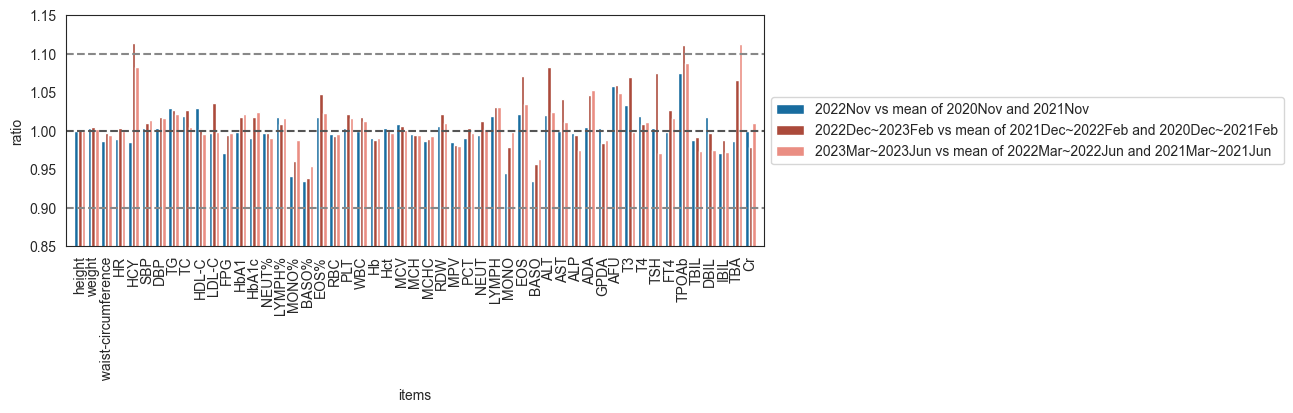

In [13]:
my_pal = ["#0172B6", "#BD3C29", "#fb8072"]
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(1,1,1)
sns.barplot(data=df_ratio, x="items", y="value", hue="variable", hue_order=l_hue_orders, palette=my_pal, ax=ax)
ax.set_ylim((0.85, 1.15))
ax.set_xlim((-1, len(l_tags)))
ax.hlines(0.9, -1, 100, linestyles="dashed", color="#888888")
ax.hlines(1.0, -1, 100, linestyles="dashed", color="#555555")
ax.hlines(1.1, -1, 100, linestyles="dashed", color="#888888")
ax.set_xticks(np.arange(len(l_tags)))
ax.set_xticklabels(l_tags, rotation=90)
ax.set_title("")
ax.set_ylabel("ratio")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig(f"{workdir}/figures/Figure1_G.pdf")

In [14]:
def get_ratio_p(my_table):
    df_mean = my_table.cont_table["P-Value (adjusted)"]
    return df_mean

my_table_pre.cont_table["P-Value (adjusted)"]

df_res_p = get_ratio_p(my_table_pre).reset_index().drop(["value"], axis=1)
df_res_p.columns = ["variable_p", "ratio_pre_p"]
df_res_p["ratio_now_p"] = get_ratio_p(my_table_).values
df_res_p["ratio_after_p"] = get_ratio_p(my_table_after).values

df_res.join(df_res_p)

,items,2022Nov vs mean of 2020Nov and 2021Nov,2022Dec~2023Feb vs mean of 2021Dec~2022Feb and 2020Dec~2021Feb,2023Mar~2023Jun vs mean of 2022Mar~2022Jun and 2021Mar~2021Jun,variable_p,ratio_pre_p,ratio_now_p,ratio_after_p
waist-circumference,waist-circumference,0.986614,0.997342,0.994662,NaN,NaN,NaN,NaN
ADA,ADA,1.005045,1.046310,1.053452,NaN,NaN,NaN,NaN
AFU,AFU,1.058023,1.058907,1.048839,NaN,NaN,NaN,NaN
ALP,ALP,0.997434,0.994297,0.974872,NaN,NaN,NaN,NaN
ALT,ALT,1.020155,1.082640,1.025062,NaN,NaN,NaN,NaN
AST,AST,0.999277,1.041641,1.011981,NaN,NaN,NaN,NaN
BASO,BASO,0.935133,0.956607,0.963598,NaN,NaN,NaN,NaN
BASO%,BASO%,0.935283,0.939071,0.954259,NaN,NaN,NaN,NaN
Cr,Cr,1.000220,0.978864,1.010697,NaN,NaN,NaN,NaN
DBIL,DBIL,1.017727,0.997501,0.975301,NaN,NaN,NaN,NaN


In [15]:
df_mean = mytable.cont_describe["mean"]
df_mean["ratio"] = df_mean.apply(lambda x: 2*x["Test-2023"] / (x["Control-2021"]+x["Control-2022"]), axis=1)
df_mean.sort_values(["ratio"])

period,Control-2021,Control-2022,Test-2023,ratio
variable,,,,
BASO%,0.591124,0.569614,0.545007,0.939071
BASO,0.035009,0.034277,0.033140,0.956607
MONO%,7.063150,6.996380,6.752330,0.960534
MONO,0.421855,0.422647,0.413251,0.978687
Cr,67.415287,66.154472,65.373336,0.978864
MPV,10.768776,10.720505,10.550380,0.981920
GPDA,75.837276,79.326059,76.389888,0.984638
Hb,139.469534,138.700133,137.486243,0.988506
IBIL,7.222855,7.014124,7.037847,0.988671
